In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading Data from provided .csv file
data = pd.read_csv('../input/digit-recognizer/train.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Retrieving labels from Data
labels = data['label']

# Converting into One-Hot Vectors for Classification
labels = pd.get_dummies(labels)
labels.shape

(42000, 10)

In [4]:
# Retrieving all pixel columns from Data
data = data.iloc[:,1:]
data.shape 

(42000, 784)

In [5]:
# Taking 40000 images to Train the model
train_data = data[2000:]
train_labels = labels[2000:]

train_data.shape, train_labels.shape

((40000, 784), (40000, 10))

In [6]:
# Taking 2000 images for Cross Validation
test_data = data[:2000]
test_labels = labels[:2000]

test_data.shape, test_labels.shape

((2000, 784), (2000, 10))

In [7]:
# Standard loc and scale values for kernel initializer 
def initialize_weights(shape, dtype=None):
    
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

# Standard loc and scale values for bias initializer
def initialize_bias(shape, dtype=None):
    
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

def DeepLearningModel(input_shape):
    model = Sequential()
    
    model.add(Input(input_shape))
    
    model.add(Dense(64, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(3e-3)))
    
    model.add(Dense(128, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(3e-3)))

    model.add(Dense(256, activation='relu', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(3e-3)))
                
    model.add(Dense(10, activation='softmax', kernel_initializer=initialize_weights, bias_initializer=initialize_bias, kernel_regularizer=l2(3e-3)))    
    
    return model


model = DeepLearningModel((784))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Hyperparameters
lr = 0.0003
epochs = 50
batch_size = 128

optimizer = Adam(lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/50
313/313 [==============================] - 2s 5ms/step - loss: 0.8860 - accuracy: 0.7409
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 0.2464 - accuracy: 0.9371
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1835 - accuracy: 0.9587
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1536 - accuracy: 0.9656
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1375 - accuracy: 0.9715
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1203 - accuracy: 0.9781
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1085 - accuracy: 0.9813
Epoch 8/50
313/313 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.9839
Epoch 9/50
313/313 [==============================] - 1s 5ms/step - loss: 0.0978 - accuracy: 0.9848
Epoch 10/50
313/313 [==============================] - 1s 5ms/step - loss: 0.0914 - accuracy: 0.9869

In [9]:
# Evaluating model using Validation Data
model.evaluate(test_data, test_labels)

63/63 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9795


[0.13216537237167358, 0.9794999957084656]

In [10]:
# Reading Test Dataset
test = pd.read_csv('../input/digit-recognizer/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [11]:
# Making Predictions on existing model.
prediction = model.predict(test)

# Rounding the prediction and converting float64 output to int64 output.
prediction = np.array(np.round(prediction), dtype='int64')

# Converting one-hot encoding into label encoding
prediction = (np.argmax(prediction, axis=1)).reshape(-1, 1)

# Creating a DataFrame similar to Example Submission
out = [{'ImageId': i+1, 'Label': prediction[i][0]} for i in range(len(prediction))]

# Creating a .csv file from the DataFrame
pd.DataFrame(out).to_csv('./submission.csv', index=False)

## Achieved 97% accuracy with Deep Learning Classifier

Now let's see how a Convolutional Neural Network will perform on the Dataset.

In [12]:
imgdata = np.reshape(np.array(data),(data.shape[0],28,28,1))
imglabels = labels

imgdata.shape, imglabels.shape

((42000, 28, 28, 1), (42000, 10))

In [13]:
# Taking 40000 images to Train the model
img_train_data = imgdata[2000:]
img_train_labels = imglabels[2000:]

img_train_data.shape, img_train_labels.shape

((40000, 28, 28, 1), (40000, 10))

In [14]:
# Taking 2000 images for Cross Validation
img_test_data = imgdata[:2000]
img_test_labels = imglabels[:2000]

img_test_data.shape, img_test_labels.shape

((2000, 28, 28, 1), (2000, 10))

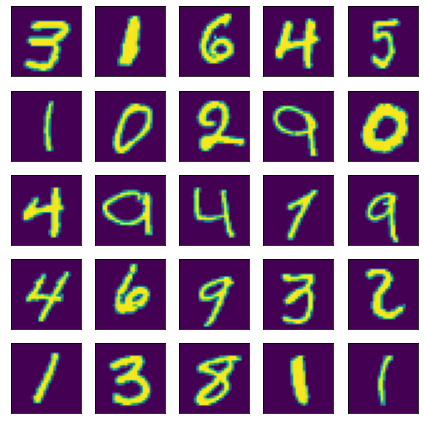

In [15]:
# Plotting Dataset

plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_train_data[i])
    plt.tight_layout()
plt.show()

In [16]:
# Building an Image Dataset for a Convolutional Neural Network.
def convolutional_model(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    model.add(Dense(10, activation='softmax',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    return model

In [17]:
model = convolutional_model((28,28,1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)         

In [18]:
# Hyperparameters
lr = 0.0003
epochs = 10
batch_size = 128

optimizer = Adam(lr)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(img_train_data, img_train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/10
313/313 [==============================] - 19s 59ms/step - loss: 0.9744 - accuracy: 0.6864
Epoch 2/10
313/313 [==============================] - 19s 61ms/step - loss: 0.1589 - accuracy: 0.9620
Epoch 3/10
313/313 [==============================] - 18s 59ms/step - loss: 0.1206 - accuracy: 0.9730
Epoch 4/10
313/313 [==============================] - 18s 59ms/step - loss: 0.1023 - accuracy: 0.9769
Epoch 5/10
313/313 [==============================] - 18s 56ms/step - loss: 0.0891 - accuracy: 0.9798
Epoch 6/10
313/313 [==============================] - 18s 58ms/step - loss: 0.0788 - accuracy: 0.9837
Epoch 7/10
313/313 [==============================] - 18s 59ms/step - loss: 0.0752 - accuracy: 0.9847
Epoch 8/10
313/313 [==============================] - 17s 55ms/step - loss: 0.0695 - accuracy: 0.9860
Epoch 9/10
313/313 [==============================] - 18s 58ms/step - loss: 0.0642 - accuracy: 0.9870
Epoch 10/10
313/313 [==============================] - 18s 56ms/step - loss: 0.066

In [19]:
model.evaluate(img_test_data, img_test_labels)

63/63 [==============================] - 1s 6ms/step - loss: 0.0604 - accuracy: 0.9905


[0.06041163206100464, 0.9904999732971191]

In [20]:
# Reading Test Dataset
test = pd.read_csv('../input/digit-recognizer/test.csv')
test = np.reshape(np.array(test), (test.shape[0], 28, 28, 1))

In [21]:
# Making Predictions on existing model.
prediction = model.predict(test)

# Rounding the prediction and converting float64 output to int64 output.
prediction = np.array(np.round(prediction), dtype='int64')

# Converting one-hot encoding into label encoding
prediction = (np.argmax(prediction, axis=1)).reshape(-1, 1)

# Creating a DataFrame similar to Example Submission
out = [{'ImageId': i+1, 'Label': prediction[i][0]} for i in range(len(prediction))]

# Creating a .csv file from the DataFrame
pd.DataFrame(out).to_csv('submission_v2.csv', index=False)